# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remaxs**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [18]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AA2526"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📁 **LECTURA DEL DATASET**

In [20]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/datos_propiedades_ecuador.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      print(path)
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [21]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

/content/drive/MyDrive/Colab Notebooks/AA2526/data/datos_propiedades_ecuador.dat
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [64]:
def analisis_valores_faltantes(df):
    analisis = {}

    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary = df.isnull().sum()

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (missing_summary / len(df)) * 100

    # TODO 1.3: Crear un dataframe solo con las columnas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores Faltantes': missing_summary,
        'Porcentaje (%)': missing_percent
    })

    # Filtrar solo las columnas que tienen al menos un valor faltante
    missing_info = missing_info[missing_info['Valores Faltantes'] > 0].sort_values(
        by='Valores Faltantes', ascending=False
    )

    return missing_info

In [65]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores Faltantes,Porcentaje (%)
estadoTran,4331,95.082327
estado,2622,57.563117
Terreno,1728,37.936334
Area Construcción,1259,27.639956
tipoTran,3,0.065862
Total M²,1,0.021954


In [70]:
def grafico_distribucion_faltantes(df):
    """Muestra un mapa de calor que indica dónde hay valores faltantes."""
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Mapa de Calor de Valores Faltantes', fontsize=14)
    plt.xlabel('Columnas')
    plt.ylabel('Filas')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


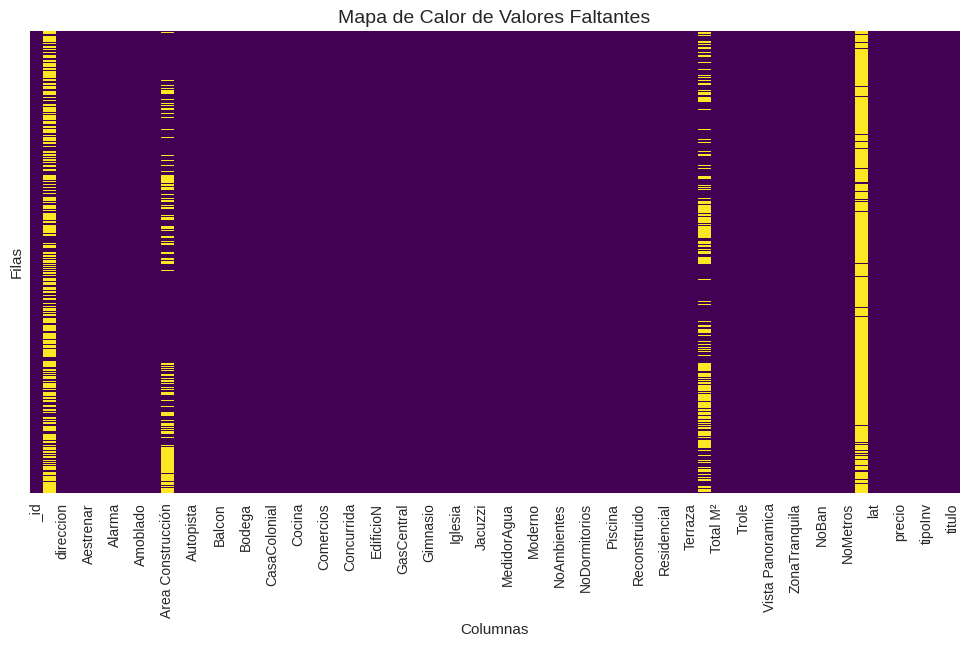

In [71]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

 **estadoTran**

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

**El patrón de valores faltantes no es completamente aleatorio; hay agrupamientos de filas con múltiples columnas ausentes.**

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

**Existen correlaciones entre los valores faltantes de algunas columnas, lo que sugiere un origen común o un sesgo sistemático en la captura de datos**


# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numéricas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # 2.1 Matriz de correlación
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    print(correlation_matrix)

    # 2.2 Visualización de matriz de correlación
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Matriz de Correlación - Variables Numéricas")
    plt.show()


🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

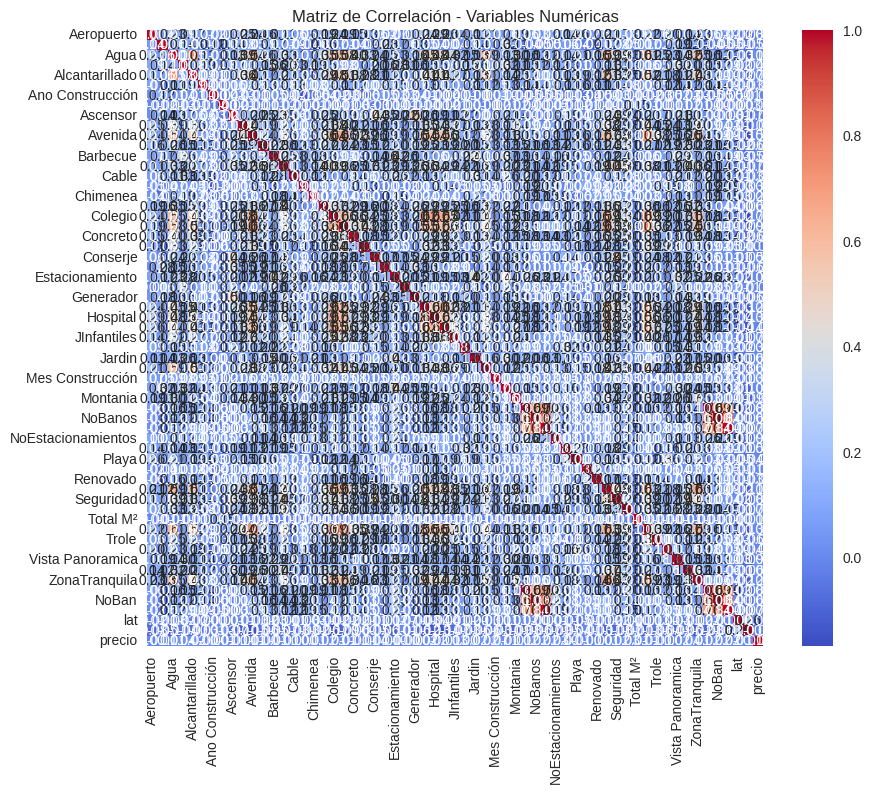

In [81]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?
**La mayoria son MAR ya que Los faltantes se deben a la dependencia con otras variables observadas**

¿Qué variables podrían predecir la presencia de valores faltantes?

**Tipo de inmueble (tipolnv, tipoProp)Ubicación (lat, lon, ZonaTranquila, VistaPanoramica) Tamaño o construcción (Total M², NoDormitorios, Área Construcción) Condición (Renovado, estadoTran) Precio (precio)**

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [83]:
from sklearn.impute import SimpleImputer

# Separar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Crear copias del DataFrame
df_imputado = df.copy()

# 1️⃣ Imputación numérica: según naturaleza de la variable
for col in num_cols:
    faltantes = df[col].isnull().sum()
    if faltantes > 0:
        # Si los datos son sesgados (ej. precios, metros) → usar mediana
        df_imputado[col] = df[col].fillna(df[col].median())
        print(f"Columna numérica '{col}' imputada con la mediana ({faltantes} valores faltantes).")

Columna numérica 'Area Construcción' imputada con la mediana (1259 valores faltantes).
Columna numérica 'Total M²' imputada con la mediana (1 valores faltantes).


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [85]:
from scipy.stats import chi2_contingency

def chi2_test(df, var1, var2):
    """
    Aplica el test Chi-cuadrado entre dos variables categóricas.
    """
    # Asegurarse de que las columnas existen antes de proceder
    if var1 not in df.columns:
        print(f"Error: La columna '{var1}' no existe en el DataFrame.")
        return
    if var2 not in df.columns:
        print(f"Error: La columna '{var2}' no existe en el DataFrame.")
        return

    tabla = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"Chi-cuadrado entre '{var1}' y '{var2}':")
    print(f"χ² = {chi2:.3f}, gl = {dof}, p-valor = {p:.5f}")
    if p < 0.05:
        print("👉 Existe relación estadísticamente significativa entre las variables.\n")
    else:
        print("❌ No se encontró relación significativa entre las variables.\n")

# Ejemplo de aplicación
chi2_test(df_imputado, 'Amoblado', 'Terraza')

# Para corregir el error 'KeyError: 'TipoInmueble'', primero verifica las columnas existentes:
# print(df_imputado.columns)
# Luego, reemplaza 'TipoInmueble' con el nombre de columna correcto de tu DataFrame.
# Por ejemplo, si el nombre correcto fuera 'TipoPropiedad':
# chi2_test(df_imputado, 'TipoPropiedad', 'ZonaTranquila')
# Si no hay una columna que represente 'TipoInmueble', considera omitir esta prueba o reevaluar la necesidad.


Chi-cuadrado entre 'Amoblado' y 'Terraza':
χ² = 26.949, gl = 1, p-valor = 0.00000
👉 Existe relación estadísticamente significativa entre las variables.



# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [86]:
for col in cat_cols:
    faltantes = df[col].isnull().sum()
    if faltantes > 0:
        moda = df[col].mode()[0]
        df_imputado[col] = df[col].fillna(moda)
        print(f"Columna categórica '{col}' imputada con la moda: {moda} ({faltantes} valores faltantes).")


Columna categórica 'estado' imputada con la moda: Usada (2622 valores faltantes).
Columna categórica 'Terreno' imputada con la moda: 200 (1728 valores faltantes).
Columna categórica 'estadoTran' imputada con la moda: VENDIDA (4331 valores faltantes).
Columna categórica 'tipoTran' imputada con la moda: De Venta (3 valores faltantes).


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

**Las columnas más difíciles fueron aquellas con alta proporción de faltantes o con valores dependientes del tipo de propiedad, como Terraza, Piscina, Vista Panorámica y Jardín.**

¿En qué casos consideraron que la eliminación era mejor que la imputación?

**Más del 50–60% de datos faltantes**

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

**MCAR hay que imputar con media/mediana/moda**

**MAR Hay que imputar según grupos o categorías**

**MNAR Hay que crear una categoría “No aplica” o usar modelos predictivos de imputación**


# 🚀 ¡TALLER FINALIZADO!"